In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from scipy import stats


In [34]:
df = pd.read_csv("FIFAPlayers2.csv")
df.head()


,wage_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,565000,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,...,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,405000,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,290000,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,...,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,125000,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,470000,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,...,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    18278 non-null  int64  
 1   pace                        16242 non-null  float64
 2   shooting                    16242 non-null  float64
 3   passing                     16242 non-null  float64
 4   dribbling                   16242 non-null  float64
 5   defending                   16242 non-null  float64
 6   physic                      16242 non-null  float64
 7   attacking_crossing          18278 non-null  int64  
 8   attacking_finishing         18278 non-null  int64  
 9   attacking_heading_accuracy  18278 non-null  int64  
 10  attacking_short_passing     18278 non-null  int64  
 11  attacking_volleys           18278 non-null  int64  
 12  skill_dribbling             18278 non-null  int64  
 13  skill_curve                 182

In [36]:
df.dropna(inplace=True)


In [37]:
len(df)


16242

In [54]:
target = df.values[:, 0]
data = df.values[:, 1:]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


In [56]:
# X_scaler = StandardScaler()
# y_scaler = StandardScaler()

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_mean, y_std = np.mean(y_train), np.std(y_train)
y_min, y_max = np.min(y_train), np.max(y_train)


# y_train = (y_train - y_mean) / y_std
# y_test = (y_test - y_mean) / y_std

y_train = (y_train - y_min) / (y_max - y_min)
y_test = (y_test - y_min) / (y_max - y_min)


In [57]:
ridge = Ridge(alpha=1000)

ridge.fit(X_train, y_train)

r2_score(y_test, ridge.predict(X_test))


0.24071774878405372

In [58]:
search = GridSearchCV(
    ridge,
    {"alpha": [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    cv=5,
    scoring="r2",
    n_jobs=-1,
).fit(X_train, y_train)

search.best_params_


{'alpha': 0.01}

In [59]:
ridge.set_params(**search.best_params_).fit(X_train, y_train)

r2_score(y_test, ridge.predict(X_test))


0.3849794228560701

In [60]:
ridge.coef_


array([-0.06853038, -0.12387195,  0.09591319, -0.12148714, -0.02690305,
        0.05844899, -0.32354493, -0.32779684, -0.16728178, -0.70543861,
        0.00698738, -0.48558083, -0.00155419, -0.01469257, -0.27494353,
       -0.677652  , -0.19803181, -0.20190086, -0.03941576, -0.36190415,
        0.00697274, -0.0719379 , -0.02562005, -0.25477653, -0.18728002,
       -0.14553035, -0.13567451, -0.46312333, -0.44797696, -0.43381945,
        0.00871634,  0.0266263 , -0.30918926, -0.40338935, -0.30411318,
        0.15454074,  0.15454074,  0.15454074,  0.29508778,  0.22132468,
        0.22132468,  0.22132468,  0.29508778,  0.18048766,  0.18048766,
        0.18048766,  0.27784829,  0.22738773,  0.22738773,  0.22738773,
        0.27784829,  0.2822071 ,  0.2129994 ,  0.2129994 ,  0.2129994 ,
        0.2822071 ,  0.21245383,  0.22443183,  0.22443183,  0.22443183,
        0.21245383])

l2 регуляризация делит поровну "кредит" между коэффициентами коррелированных признаков  

In [61]:
lasso = Lasso()

lasso.fit(X_train, y_train)

r2_score(y_test, lasso.predict(X_test))


-5.3836007651852924e-08

In [74]:
search = GridSearchCV(
    lasso,
    {"alpha": [0.00005, 0.001, 0.005, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    cv=5,
    scoring="r2",
    n_jobs=-1,
).fit(X_train, y_train)

search.best_params_


{'alpha': 5e-05}

alpha=0.001 не сходится и за 10000 итераций (30 сек обучения) (актуально для StandardScaler)

In [75]:
lasso.set_params(**search.best_params_).fit(X_train, y_train)

r2_score(y_test, lasso.predict(X_test))


0.28515979238030253

In [80]:
lasso.coef_ 

array([ 2.60986053e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.91269345e-03, -5.23829855e-03,  0.00000000e+00,
        1.80614958e-02,  0.00000000e+00,  1.49662308e-02,  0.00000000e+00,
        0.00000000e+00, -4.38661154e-03, -2.37235100e-03,  1.02216606e-02,
        6.86453406e-05,  6.48219472e-03, -7.80464154e-03,  9.09879202e-02,
        0.00000000e+00, -0.00000000e+00,  9.72878410e-04, -1.33603365e-02,
       -0.00000000e+00, -2.30257413e-02, -6.23767296e-03, -1.98278173e-03,
       -1.54024102e-02,  0.00000000e+00,  3.53755189e-03,  3.38913404e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.41021093e-02,
        1.79035526e-17,  3.35691611e-18,  0.00000000e+00,  7.18667906e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.52330523e-03,
        1.78853071e-18,  1.43082457e-18,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [79]:
print(len(df.columns[1:][lasso.coef_ != 0]))

df.columns[1:][lasso.coef_ != 0]


29


Index(['pace', 'physic', 'attacking_crossing', 'attacking_heading_accuracy',
       'attacking_volleys', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'power_jumping',
       'power_stamina', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_penalties', 'mentality_composure', 'lf', 'cf', 'rf', 'lam',
       'lcm', 'cm', 'rcm', 'lb', 'rb'],
      dtype='object')

In [78]:
ridge.coef_[np.where(lasso.coef_ == 0)]

array([-0.12387195,  0.09591319, -0.12148714, -0.02690305, -0.32779684,
       -0.70543861, -0.48558083, -0.00155419,  0.00697274, -0.0719379 ,
       -0.18728002, -0.43381945, -0.30918926, -0.40338935, -0.30411318,
        0.15454074,  0.15454074,  0.15454074,  0.29508778,  0.29508778,
        0.18048766,  0.18048766,  0.27784829,  0.27784829,  0.2822071 ,
        0.2129994 ,  0.2129994 ,  0.2129994 ,  0.2822071 ,  0.22443183,
        0.22443183,  0.22443183])

<AxesSubplot:>

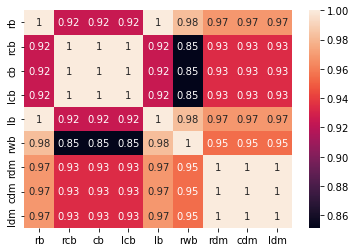

In [81]:
sns.heatmap(df.iloc[:, -1:-10:-1].corr(method="pearson"), annot=True)


cdm, rdm

rcb, lcb


<AxesSubplot:>

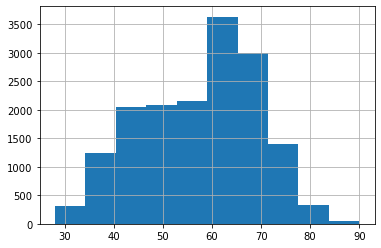

In [82]:
df["rcb"].hist()


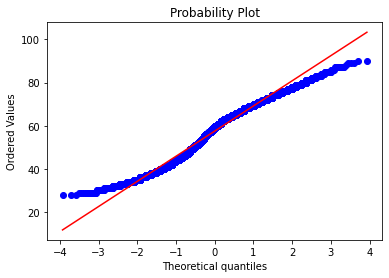

In [83]:
stats.probplot(df["rcb"], dist="norm", plot=plt)
plt.show()


In [84]:
stats.shapiro(df["rcb"].sample(500))


ShapiroResult(statistic=0.9812924265861511, pvalue=4.895319761999417e-06)

<AxesSubplot:>

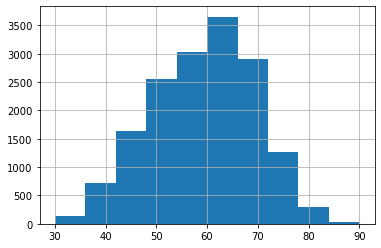

In [85]:
df["cdm"].hist()


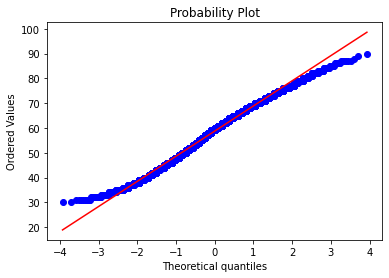

In [86]:
stats.probplot(df["cdm"], dist="norm", plot=plt)
plt.show()


In [87]:
stats.shapiro(df["cdm"].sample(5000))


ShapiroResult(statistic=0.9915997982025146, pvalue=1.2054223810560474e-16)

In [88]:
r, pvalue = stats.pearsonr(df["cdm"], df["rdm"])
print("r:", r, "\npvalue:", pvalue)


r: 1.0 
pvalue: 0.0


<AxesSubplot:>

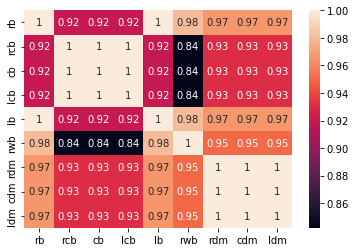

In [89]:
sns.heatmap(df.iloc[:, -1:-10:-1].corr(method="spearman"), annot=True)


In [90]:
rs, pvalue = stats.spearmanr(df["cdm"], df["rdm"])
print("rs:", rs, "\npvalue:", pvalue)


rs: 1.0 
pvalue: 0.0


In [91]:
rs, pvalue = stats.spearmanr(df["rcb"], df["rwb"])
print("rs:", rs, "\npvalue:", pvalue)


rs: 0.8420990791238221 
pvalue: 0.0


In [92]:
contingency_table = pd.crosstab(df["cdm"], df["rwb"])
stats.chi2_contingency(contingency_table, correction=False)

(113697.79115900435,
 0.0,
 3360,
 array([[1.23137545e-04, 3.69412634e-04, 8.61962812e-04, ...,
         7.38825268e-04, 1.23137545e-04, 1.23137545e-04],
        [5.54118951e-04, 1.66235685e-03, 3.87883266e-03, ...,
         3.32471371e-03, 5.54118951e-04, 5.54118951e-04],
        [9.85100357e-04, 2.95530107e-03, 6.89570250e-03, ...,
         5.91060214e-03, 9.85100357e-04, 9.85100357e-04],
        ...,
        [6.15687723e-05, 1.84706317e-04, 4.30981406e-04, ...,
         3.69412634e-04, 6.15687723e-05, 6.15687723e-05],
        [6.15687723e-05, 1.84706317e-04, 4.30981406e-04, ...,
         3.69412634e-04, 6.15687723e-05, 6.15687723e-05],
        [6.15687723e-05, 1.84706317e-04, 4.30981406e-04, ...,
         3.69412634e-04, 6.15687723e-05, 6.15687723e-05]]))